# Code-Beispiel: Logistische Regression

In diesem Notebook wollen wir anhand des Digits-Datensatzes Vorhersagen mit logistischer Regression machen. In diesem Datensatz is jeder Datenpunkt ein 8x8-Pixel Bild und stellt eine Ziffer 0-9 dar. Das Vorhersageproblem besteht darin, anhand der 64 Pixelwerte vorherzusagen um welche Zahl es sich handelt.
Eine nähere Beschreibung der Daten findet sich [hier](https://scikit-learn.org/stable/datasets/index.html#digits-dataset).

### Laden des Digits-Datensatzes

Zuerst Laden wir den `Digits`-Datensatz direkt mit der `sklearn`-Library.

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()

In [22]:
type(digits)

sklearn.utils.Bunch

Es handelt sich um ein `Bunch`-Objekt, aus welchem wir die Features und die Labels extrahieren können.

In [23]:
data = digits.data
labels = digits.target

In [24]:
print(type(data))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Beides sind `numpy`-Arrays. Schauen wir uns den ersten Datenpunkt an.

In [25]:
print(f"Datenpunkt: {data[0]}")
print(f"Shape: {data[0].shape}")
print(f"Label: {labels[0]}")

Datenpunkt: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Shape: (64,)
Label: 0


Ein Datenpunkt hat 64 Features und ein Label. Bei den Features handelt es sich um die Graustufen (0..16) für ein 8x8 Bild. Das Label stellt die Ziffer (0-9) dar, welche auf dem Bild zu sehen ist. Um das zu veranschaulichen, visualieren wir 15 Beispiele.

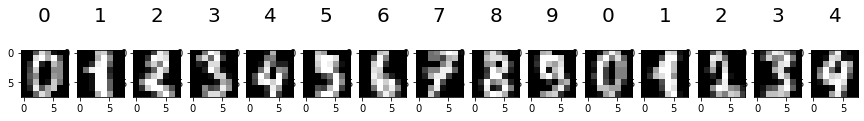

In [26]:
import numpy as np 
import matplotlib.pyplot as plt

no_images = 15
plt.figure(figsize=(no_images, 1))
for index, (image, label) in enumerate(zip(digits.data[0:no_images], digits.target[0:no_images])):
    plt.subplot(1, no_images, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i\n' % label, fontsize = 20)

### Binäre Klassifikation

Ziel ist es jetzt mit Hilfe der Features (Pixelwerte) das Label (die abgebildete Ziffer) vorherzusagen. Dazu wollen wir uns im ersten Schritt auf eine einfache binäre Klassifizierung beschränken und Vorhersagen ob auf dem Bild die Ziffer `0` zu sehen ist.

Zuerst unterteilen wir die Daten in Trainings- und Testdaten.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

Dann müssen wir das Label so umwandeln, dass es `1` für die Ziffer `0` ist, und sonst `0`.

In [28]:
def label_to_binary(digit, labels):
    binary_labels = []
    for label in labels:
        if(label == digit):
            binary_labels.append(1)
        else:
            binary_labels.append(0)
    return binary_labels
    # oder in einer Zeile als: return [1 if x == 0 else 0 for x in digits.target]

In [29]:
y_train_binary = label_to_binary(0, y_train)

Danach trainieren wir das logistische Regressionsmodell.

In [30]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train, y_train_binary)

LogisticRegression(max_iter=1000)

### Testen des Regressionsmodells

Schauen wir uns nun zwei Beispiele aus den Testdaten und die dazugehörige Vorhersage an.

In [31]:
data_index = 0
prediction = logisticRegr.predict(X_test[data_index].reshape(1,-1))
print(f"Vorhersage auf Datenpunkt {data_index}: {prediction}")

Vorhersage auf Datenpunkt 0: [0]


Das Modell sagt die Klasse `0` vorraus (d.h. dass nicht die Ziffer 0 abgebildet ist). Schauen wir uns das richtige Label und den zugehörigen Plot an.

Text(0.5, 1.0, 'Ziffer: 2')

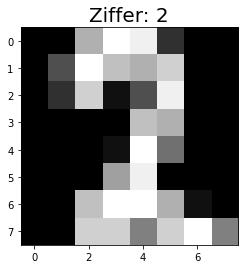

In [32]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title(f'Ziffer: {y_test[data_index]}', fontsize = 20)

Die Vorhersage ist richtig (es ist nicht die Ziffer 0 auf dem Bild dargestellt).
Schauen wir uns ein zweites Beispiel an.

In [33]:
data_index = 17
prediction = logisticRegr.predict(X_test[data_index].reshape(1,-1))
print(f"Vorhersage auf Datenpunkt {data_index}: {prediction}")

Vorhersage auf Datenpunkt 17: [1]


Text(0.5, 1.0, 'Ziffer: 0')

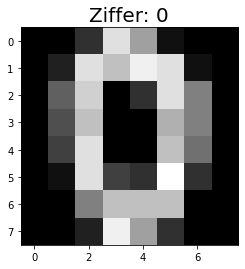

In [34]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title('Ziffer: %i' % y_test[data_index], fontsize = 20)

In diesem Fall sagt das Modell die Klasse `1` (=es ist eine Null auf dem Bild zu sehen) voraus,  es ist auch tatsächlich eine `0` in dem Bild (d.h. das Modell liegt richtig). 

Schauen wir uns die Performance auf allen Testdaten an.

In [35]:
predictions = logisticRegr.predict(X_test)
y_test_binary = label_to_binary(0, y_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_binary, predictions)

0.9944444444444445

Die Accuracy ist für dieses einfach Modell bei 99 Prozent. Schauen wir uns Precision und Recall an.

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test_binary, predictions)

0.9310344827586207

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test_binary, predictions)

1.0

Das Modell erkennt alle `0`en im Testdatensatz und ist dabei `93%` präzise.

Es scheint also so, dass das Problem eine `0` in diesem Datensatz zu erkennen nicht sehr schwierig ist.

Da wir jedoch nicht keine 100% Precision haben, macht das Modell Fehler (es erkennt eine `0` obwohl keine `0` abgebildet ist). Schauen wir uns exemplarisch einen Fehler an.

In [39]:
data_index = 117
prediction = logisticRegr.predict(X_test[data_index].reshape(1,-1))
print(f"Vorhersage auf Datenpunkt {data_index}: {prediction}")

Vorhersage auf Datenpunkt 117: [1]


Text(0.5, 1.0, 'Ziffer: 2')

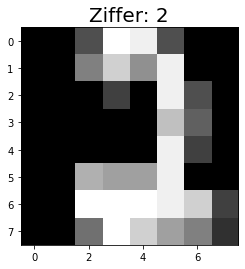

In [40]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title('Ziffer: %i' % y_test[data_index], fontsize = 20)

Dieses Bild hält das Modell fälschlicherweiße diese `2` für eine `0`.

### Multiklassen-Klassifikation

Im nächsten Modell erweitern wir das Vorhersagemodell dahingehend, dass wir alle Klassen (= Ziffern) vorhersagen wollen. Dies geschieht mit einer multinominalen logistischen Regression.

Dazu trainieren wir individuelle Modell für jede Ziffer von 0 bis 9.

In [41]:
models = []
for i in range(0,10):
    logisticRegr = LogisticRegression(max_iter=1000)
    y_train_binary = label_to_binary(i, y_train)
    logisticRegr.fit(X_train, y_train_binary)
    models.append(logisticRegr)

Diese Modell nutzen wir jetzt bei der Vorhersage, in dem wir mit jedem Modell eine Vorhersage auf ein gegebens Bild machen und uns für die Vorhersage mit der höchsten Wahrscheinlichkeit entscheiden. Dazu brauchen wir (anstelle der vorhergesagten Klasse) die Vorhersagewahrscheinlichkeit eines Modells. Dies schauen wir uns zuerst an einem Beispiel an:

In [42]:
data_index = 34
predictions = []
for index, model in enumerate(models):  
    prediction = model.predict_proba(X_test[data_index].reshape(1,-1))[0][1]
    print(f"Vorhersage mit Modell für Ziffer {index} ist {prediction}")
    predictions.append(prediction) # wir wollen nur die WK für Klasse "1"

Vorhersage mit Modell für Ziffer 0 ist 0.0012082723785015782
Vorhersage mit Modell für Ziffer 1 ist 1.8180013079239412e-10
Vorhersage mit Modell für Ziffer 2 ist 3.311895664094988e-07
Vorhersage mit Modell für Ziffer 3 ist 1.039966976210068e-06
Vorhersage mit Modell für Ziffer 4 ist 6.5573132241567494e-12
Vorhersage mit Modell für Ziffer 5 ist 1.1383857293055642e-06
Vorhersage mit Modell für Ziffer 6 ist 1.2870233873747558e-15
Vorhersage mit Modell für Ziffer 7 ist 2.049227085836648e-09
Vorhersage mit Modell für Ziffer 8 ist 0.04650907768510973
Vorhersage mit Modell für Ziffer 9 ist 0.9999999944553826


In [43]:
prediction = predictions.index(max(predictions))
print(f"Vorhergesagte Klasse: {prediction}")

Vorhergesagte Klasse: 9


Text(0.5, 1.0, 'Ziffer: 9')

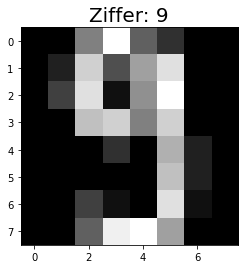

In [44]:
plt.plot()
plt.imshow(np.reshape(X_test[data_index], (8,8)), cmap=plt.cm.gray)
plt.title('Ziffer: %i' % y_test[data_index], fontsize = 20)

Wie wir sehen stimmt die vorhergesagte Ziffer in diesem Fall mit der tatsächlichen Ziffer überein. Im nächsten Schritt schauen wir uns die Vorhersage über alle Testdatenpunkte an und schauen auf die Accuarcy.
Dazu sagen wir mit jedem der 10 Modelle auf jedem Testdatenpunkt vorher, und merken uns die Klasse mit der höchsten Wahrscheinlichkeit:

In [45]:
test_predictions = []
for data_point in X_test:
    predictions = []
    for model in models:  
        prediction = model.predict_proba(data_point.reshape(1,-1))[0][1]
        predictions.append(prediction) # wir wollen nur die WK für Klasse "1"
    predicted_class = predictions.index(max(predictions))
    test_predictions.append(predicted_class)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

0.9472222222222222

Wie wir sehen können wir mit unserem recht simplen Modell bereits in 95% der Fälle die richtige Ziffer vorhersagen.